<a href="https://colab.research.google.com/github/narinzar/ml_classifier_fastai/blob/main/image_classifier.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/narinzar/ml_classifier_fastai/blob/main/image_classifier.ipynb)
# Detailed Guide to Image Classification with fastai for Beginners

This notebook provides a detailed guide to building an image classifier using the fastai library. We'll cover each step thoroughly, explaining key concepts as we go.

## 1. Setting Up the Environment

First, we need to install the fastai library and its dependencies.

In [1]:
# Install fastai
!pip install fastai

# Import necessary libraries
from fastai.vision.all import *

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 84.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 83.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 58.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 35.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 16.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 5.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.9 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling nvidia-nvjitlink-cu12-12.5.82:
      Successfully uninstalled nvidia-nvjitl

## 2. Getting the Data

There are several ways to get data for your image classifier. We'll use the Oxford-IIIT Pet Dataset, which contains images of cats and dogs of 37 different breeds.

In [2]:
# Download and extract a built-in dataset
path = untar_data(URLs.PETS)

## 3. Understanding Your Data: Exploratory Data Analysis

Before building any model, it's crucial to understand your data.

In [3]:
# Get list of image files
files = get_image_files(path/"images")

# Print number of images
print(f"Total number of images: {len(files)}")

# Print first few filenames to understand naming pattern
print("Sample filenames:")
for i, file in enumerate(files[:5]):
    print(f"  {i+1}. {file.name}")

Total number of images: 7390
Sample filenames:
  1. Siamese_48.jpg
  2. japanese_chin_83.jpg
  3. german_shorthaired_107.jpg
  4. Abyssinian_141.jpg
  5. Ragdoll_177.jpg


### Looking at Image Dimensions and Formats

In [4]:
from PIL import Image
import random

# Sample a few random images
sample_files = random.sample(files, 5)

print("Sample image details:")
for file in sample_files:
    img = Image.open(file)
    print(f"Filename: {file.name}, Size: {img.size}, Format: {img.format}")

Sample image details:
Filename: basset_hound_36.jpg, Size: (500, 333), Format: JPEG
Filename: Egyptian_Mau_9.jpg, Size: (600, 437), Format: JPEG
Filename: leonberger_48.jpg, Size: (500, 375), Format: JPEG
Filename: Persian_75.jpg, Size: (375, 500), Format: JPEG
Filename: wheaten_terrier_102.jpg, Size: (500, 333), Format: JPEG


### Examining Class Distribution

In [5]:
# If classes are in folders
if (path/"images").ls()[0].is_dir():
    classes = [d.name for d in (path/"images").ls() if d.is_dir()]
    print(f"Classes: {classes}")

    # Count images per class
    class_counts = {}
    for cls in classes:
        class_counts[cls] = len(list((path/"images"/cls).ls()))

    for cls, count in class_counts.items():
        print(f"Class {cls}: {count} images")

# If classes are in filenames (like in the Pets dataset)
else:
    # Extract breed name from filename
    def get_breed(filename):
        return '_'.join(filename.split('_')[:-1])

    # Count images per breed
    breed_counts = {}
    for file in files:
        breed = get_breed(file.name)
        if breed in breed_counts:
            breed_counts[breed] += 1
        else:
            breed_counts[breed] = 1

    print(f"Total number of breeds: {len(breed_counts)}")

    # Display a few examples
    print("Sample breed counts:")
    for i, (breed, count) in enumerate(list(breed_counts.items())[:5]):
        print(f"  {i+1}. {breed}: {count} images")

Total number of breeds: 37
Sample breed counts:
  1. Siamese: 200 images
  2. japanese_chin: 200 images
  3. german_shorthaired: 200 images
  4. Abyssinian: 200 images
  5. Ragdoll: 200 images


### Visualizing Sample Images

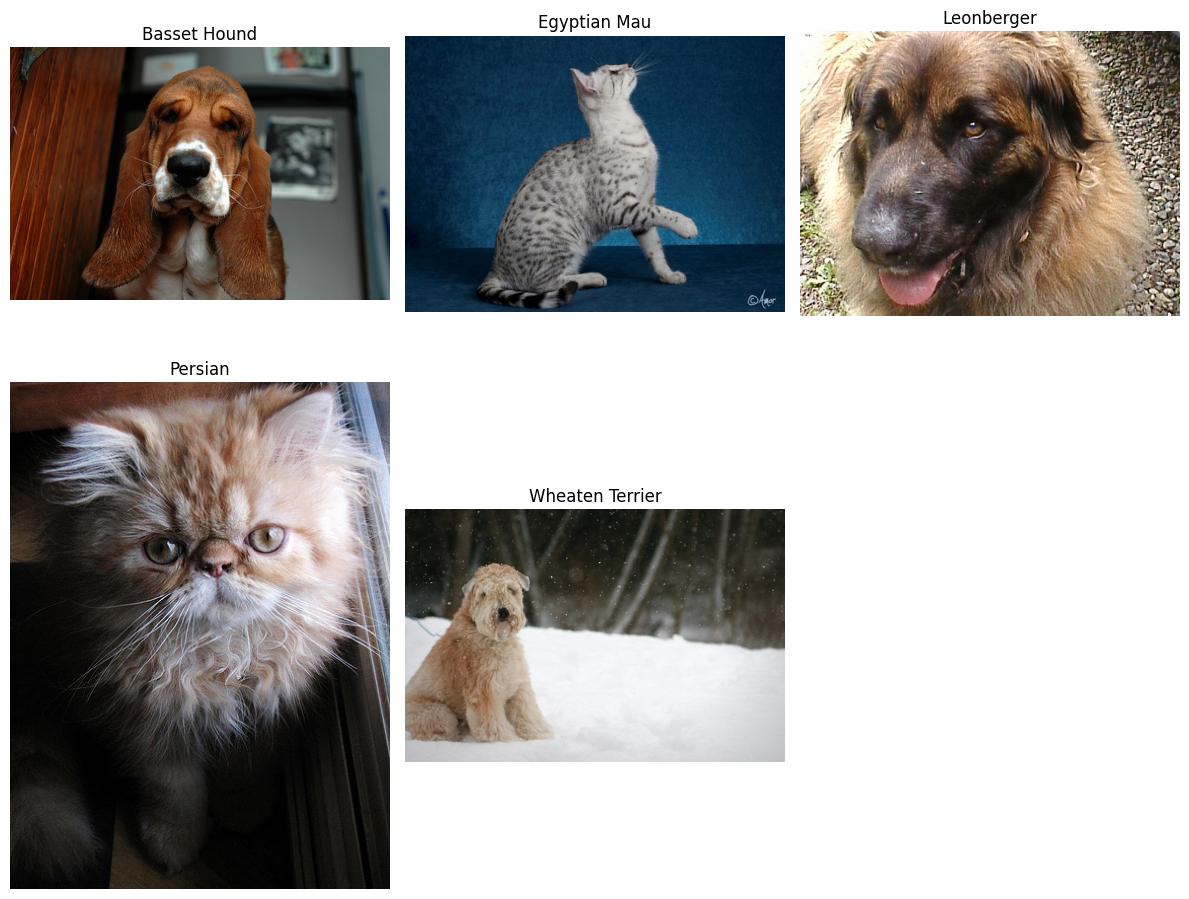

In [6]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 10))

for i, file in enumerate(sample_files):
    img = Image.open(file)
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.title(get_breed(file.name).replace('_', ' ').title())
    plt.axis('off')

plt.tight_layout()
plt.show()

## 4. Data Preprocessing and DataLoaders

### Understanding DataLoaders

DataLoaders handle the data pipeline, including loading images in batches, applying transformations, splitting data into training and validation sets, and providing iterators for model training.

### Creating DataLoaders

In [8]:
# Define how to extract labels from filenames
def get_label(filename):
    return '_'.join(filename.split('_')[:-1])

# Create DataLoaders
dls = ImageDataLoaders.from_name_func(
    path,                  # Path to the data directory
    files,                 # List of image files
    get_label,             # Function to get label from filename
    valid_pct=0.2,         # Use 20% of data for validation
    seed=42,               # Random seed for reproducibility
    item_tfms=Resize(224), # Resize all images to 224x224 pixels
    batch_size=32          # Process 32 images at a time
)

# Check classes
print(f"Classes: {dls.vocab}")
print(f"Total classes: {len(dls.vocab)}")

Classes: ['Abyssinian', 'Bengal', 'Birman', 'Bombay', 'British_Shorthair', 'Egyptian_Mau', 'Maine_Coon', 'Persian', 'Ragdoll', 'Russian_Blue', 'Siamese', 'Sphynx', 'american_bulldog', 'american_pit_bull_terrier', 'basset_hound', 'beagle', 'boxer', 'chihuahua', 'english_cocker_spaniel', 'english_setter', 'german_shorthaired', 'great_pyrenees', 'havanese', 'japanese_chin', 'keeshond', 'leonberger', 'miniature_pinscher', 'newfoundland', 'pomeranian', 'pug', 'saint_bernard', 'samoyed', 'scottish_terrier', 'shiba_inu', 'staffordshire_bull_terrier', 'wheaten_terrier', 'yorkshire_terrier']
Total classes: 37


### Understanding Transformations

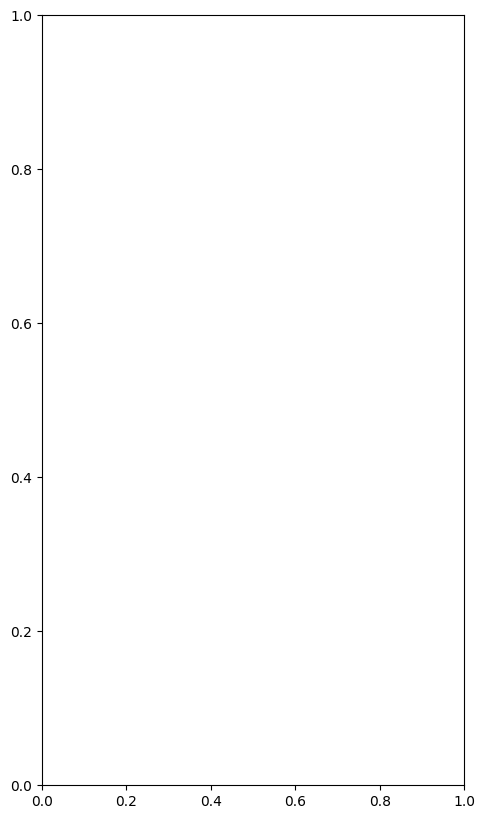

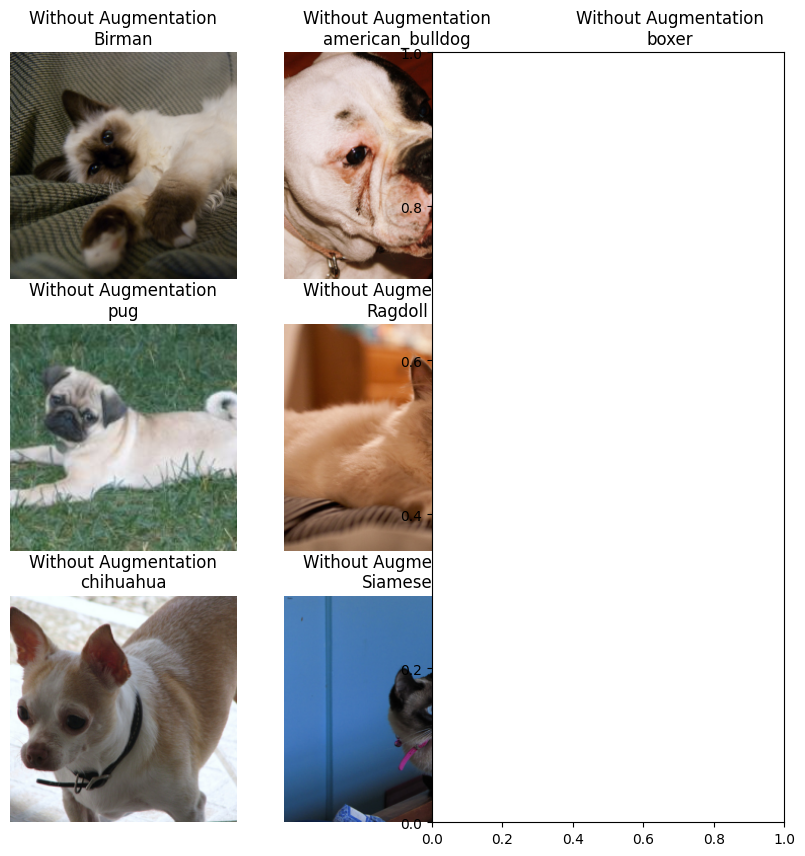

In [9]:
# Basic transformations (resize only)
dls_basic = ImageDataLoaders.from_name_func(
    path, files, get_label,
    item_tfms=Resize(224),    # Resize each image to 224x224
    valid_pct=0.2
)

# Advanced transformations (with data augmentation)
dls_aug = ImageDataLoaders.from_name_func(
    path, files, get_label,
    item_tfms=Resize(224),    # Resize each image
    batch_tfms=aug_transforms(  # Apply these augmentations to each batch
        mult=2,                # Intensity multiplier
        do_flip=True,          # Random horizontal flips
        flip_vert=False,       # No vertical flips
        max_rotate=10.0,       # Max rotation angle (degrees)
        min_zoom=1.0,          # Min zoom factor
        max_zoom=1.1,          # Max zoom factor
        max_lighting=0.2,      # Max lighting adjustment
        max_warp=0.2           # Max warp adjustment
    ),
    valid_pct=0.2
)

# Visualize a batch with and without augmentation
plt.figure(figsize=(12, 10))
plt.subplot(1, 2, 1)
dls_basic.show_batch(max_n=9, nrows=3, ncols=3, figsize=(10, 10), title="Without Augmentation")
plt.subplot(1, 2, 2)
dls_aug.show_batch(max_n=9, nrows=3, ncols=3, figsize=(10, 10), title="With Augmentation")

## 5. Understanding Transfer Learning and Model Architecture

### What is Transfer Learning?

Transfer learning involves taking a model trained on a large dataset (like ImageNet) and adapting it to your specific task. This works because early layers of deep neural networks learn general features (edges, textures), while later layers learn more task-specific features.

In [10]:
# Create a learner with a pre-trained ResNet34 model
learn = vision_learner(
    dls,             # Our DataLoaders
    resnet34,        # The architecture to use (ResNet with 34 layers)
    pretrained=True, # Use weights pre-trained on ImageNet
    metrics=error_rate  # Metric to track during training
)

# Examine the model architecture
print(learn.model)

Downloading: "https://download.pytorch.org/models/resnet34-b627a593.pth" to /root/.cache/torch/hub/checkpoints/resnet34-b627a593.pth
100%|██████████| 83.3M/83.3M [00:00<00:00, 111MB/s]


Sequential(
  (0): Sequential(
    (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
    (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU(inplace=True)
    (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
    (4): Sequential(
      (0): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
        (relu): ReLU(inplace=True)
        (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      )
      (1): BasicBlock(
        (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
        (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  

### Understanding the Model Architecture

ResNet34 consists of:

- A stem (initial convolution layers)
- Four blocks of residual layers
- An adaptive pooling layer
- A fully connected (linear) head

When using `vision_learner`, fastai:

- Takes the pre-trained ResNet
- Removes the final layer (designed for 1000 ImageNet classes)
- Adds a new head with a layer matching your number of classes

In [11]:
# Print the model's layer groups
print("Model layer groups:")
for i, layer_group in enumerate(learn.model):
    print(f"Group {i+1}: {layer_group}")

Model layer groups:
Group 1: Sequential(
  (0): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace=True)
  (3): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (4): Sequential(
    (0): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    )
    (1): BasicBlock(
      (conv1): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inp

## 6. Training the Model: Understanding Fine-Tuning

### What is Fine-Tuning?

Fine-tuning has two phases:

1. **Freeze**: Train only the new head, keeping pre-trained weights frozen.
2. **Unfreeze**: Gradually train all layers, with lower learning rates for earlier layers.

### Step 1: Finding a Good Learning Rate

The learning rate controls how quickly the model updates its weights.

SuggestedLRs(valley=0.001737800776027143)

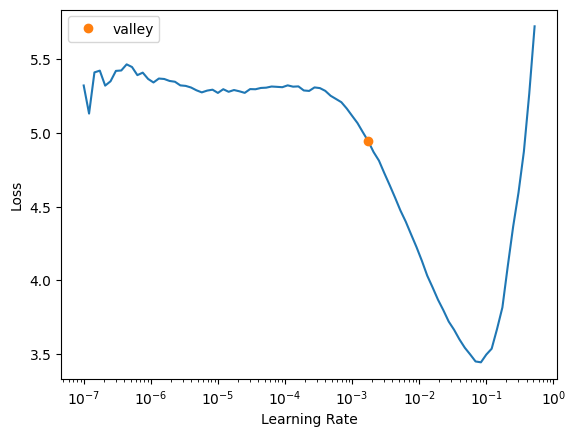

In [12]:
# Find optimal learning rate
learn.lr_find()

### Step 2: Train the Head (Freeze)

In [13]:
# Train only the head for 1 epoch
learn.fit_one_cycle(1, 3e-3)

### Step 3: Fine-Tune the Entire Model (Unfreeze)

In [14]:
# Unfreeze all layers
learn.unfreeze()

# Train with different learning rates for different layer groups
learn.fit_one_cycle(4, lr_max=slice(1e-5, 1e-3))

### What is an Epoch?

An epoch is one complete pass through the entire training dataset. During each epoch:

- The model sees every training image once
- Updates its weights based on the errors it makes
- Checks its performance on the validation set

Multiple epochs are needed because:

- The model learns incrementally
- Random batching means each epoch presents data in a different order
- With data augmentation, the model sees different versions of images

### Understanding the Training Output

During training, fastai shows:

- `epoch`: Current epoch number
- `train_loss`: Average loss on training data
- `valid_loss`: Average loss on validation data
- `error_rate`: Percentage of validation images misclassified
- `time`: Time taken for the epoch

A decreasing validation loss means the model is learning. If validation loss increases while training loss continues to decrease, the model is overfitting.

## 7. Model Evaluation and Interpretation

### Understanding the Confusion Matrix

In [15]:
# Create an interpretation object
interp = ClassificationInterpretation.from_learner(learn)

# Plot confusion matrix
interp.plot_confusion_matrix(figsize=(12, 12), dpi=60)

A confusion matrix shows:

- Rows: Actual classes
- Columns: Predicted classes
- Diagonal: Correct predictions
- Off-diagonal: Mistakes

Brighter colors indicate more samples. Ideally, most brightness should be on the diagonal.

### Top Losses Analysis

In [16]:
# Show images with highest loss values
interp.plot_top_losses(9, figsize=(15, 11))

For each image, it shows:

- Predicted class
- Actual class
- Loss value
- Probability of actual class

This helps identify:

- Mislabeled data
- Genuinely difficult cases
- Patterns in model mistakes

### Most Confused Classes

In [17]:
# Show most confused class pairs
interp.most_confused(min_val=5)

[('Birman', 'Ragdoll', np.int64(6)),
 ('Egyptian_Mau', 'Bengal', np.int64(6)),
 ('chihuahua', 'miniature_pinscher', np.int64(5))]

This shows pairs of classes the model confuses most often.

## 8. Making Predictions and Using the Model

In [18]:
# Example: Make a prediction on a new image
img = PILImage.create('path/to/new/image.jpg')

# Predict
pred, pred_idx, probs = learn.predict(img)

# Display results
print(f"Prediction: {pred}")
print(f"Probability: {probs[pred_idx]:.4f}")

# Show image with prediction
img.show()
print(f"Predicted: {pred}")

FileNotFoundError: [Errno 2] No such file or directory: 'path/to/new/image.jpg'

## 9. Practical Exercise: Building Your Own Classifier

Let's put it all together with a simple pet classifier:

In [ ]:
# 1. Get data
path = untar_data(URLs.PETS)
files = get_image_files(path/"images")

# 2. Define label function
def get_label(file): return '_'.join(file.name.split('_')[:-1])

# 3. Create DataLoaders
dls = ImageDataLoaders.from_name_func(
    path, files, get_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224, min_scale=0.8),
    valid_pct=0.2
)

# 4. Check data
dls.show_batch(max_n=9, figsize=(12, 10))

# 5. Create learner
learn = vision_learner(dls, resnet34, metrics=error_rate)

# 6. Find good learning rate
learn.lr_find()

# 7. Train head
learn.fit_one_cycle(1, 3e-3)

# 8. Fine-tune entire model
learn.unfreeze()
learn.fit_one_cycle(4, slice(1e-5, 1e-3))

# 9. Evaluate results
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()
interp.plot_top_losses(9)

# 10. Save model
learn.export('pet_classifier.pkl')

## 10. Advanced Techniques for Improving Performance

### Using Different Architectures

In [ ]:
# Try a more powerful architecture
learn_resnet50 = vision_learner(dls, resnet50, metrics=error_rate)
learn_resnet50.fine_tune(4)

### Progressive Resizing

Train on smaller images first, then larger ones:

In [ ]:
# First train on smaller images
dls_small = ImageDataLoaders.from_name_func(
    path, files, get_label,
    item_tfms=Resize(128),
    batch_tfms=aug_transforms(size=128),
    valid_pct=0.2
)
learn_prog = vision_learner(dls_small, resnet34, metrics=error_rate)
learn_prog.fine_tune(3)

# Then move to larger images
dls_large = ImageDataLoaders.from_name_func(
    path, files, get_label,
    item_tfms=Resize(224),
    batch_tfms=aug_transforms(size=224),
    valid_pct=0.2
)
learn_prog.dls = dls_large
learn_prog.fine_tune(2)

### Test Time Augmentation (TTA)

Make predictions on augmented versions of test images and average results:

In [ ]:
# Regular prediction
pred, pred_idx, probs = learn.predict(img)
print(f"Regular prediction: {pred}, Confidence: {probs[pred_idx]:.4f}")

# Prediction with TTA
preds, _, probs = learn.tta(img)
print(f"TTA prediction: {preds[0]}, Confidence: {probs[0][0]:.4f}")

## Key Concepts Explained

### Overfitting vs. Underfitting

- **Underfitting**: Model is too simple, performs poorly on both training and validation.
- **Overfitting**: Model memorizes training data but generalizes poorly (good training metrics, poor validation).

### Loss Functions

The loss function measures how wrong the model's predictions are:

- **CrossEntropyLoss**: Standard for classification (measures how far predictions are from the correct class).

### Metrics

Metrics are human-readable performance measures:

- **Error Rate**: Percentage of incorrect predictions (lower is better).
- **Accuracy**: Percentage of correct predictions (higher is better).

### Batch Size

The number of images processed together:

- Larger batch size: More stable gradients, but requires more memory.
- Smaller batch size: Less memory required, but training may be less stable.

### Learning Rate

Controls how quickly weights update:

- Too high: Model may never converge.
- Too low: Training takes too long.
- One-cycle policy: Start low, increase then decrease (better convergence).

I hope this detailed explanation helps you understand the process of building an image classifier with fastai! Would you like me to explain any particular concept in more depth?